<a href="https://colab.research.google.com/github/itsRenuka22/Autism-Detection-System/blob/main/With_Q_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Analysis with QChat-10-Score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv to Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv


### Import Data

In [ ]:
df = pd.read_csv("Toddler_Autism_dataset July 2018_ogfile - Toddler Autism dataset July 2018.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ClassASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df.shape

(1054, 19)

### Display Columns

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ClassASD_Traits'],
      dtype='object')

### Removing unnecessary parameters

In [ ]:
df = df.drop(['Case_No','Who_completed_the_test'], axis=1)
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ClassASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


### Understanding type of data and converting into suitable format

In [ ]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
ClassASD_Traits        object
dtype: object

Machine Learning algorithms usually rely on mathematical operations which require their inputs to be of numeric type. So, we need to convert the 'object' type data into 'int' type.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'ClassASD_Traits', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Qchat-10-Score         int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
ClassASD_Traits        int64
dtype: object

### Check for null values

In [ ]:
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
ClassASD_Traits        0
dtype: int64

No null values are present

### Setting input and target variables

We input all the values of the columns from A0 to Family_mem_with_ASD and our target variable is ClassAsd_Traits

In [ ]:
x = df.drop('ClassASD_Traits', axis='columns')   #inputs = x
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1


In [ ]:
y = df['ClassASD_Traits']     #target = y
y.head()

0    0
1    1
2    1
3    1
4    1
Name: ClassASD_Traits, dtype: int64

### Heat Map

In [ ]:
import seaborn as sns

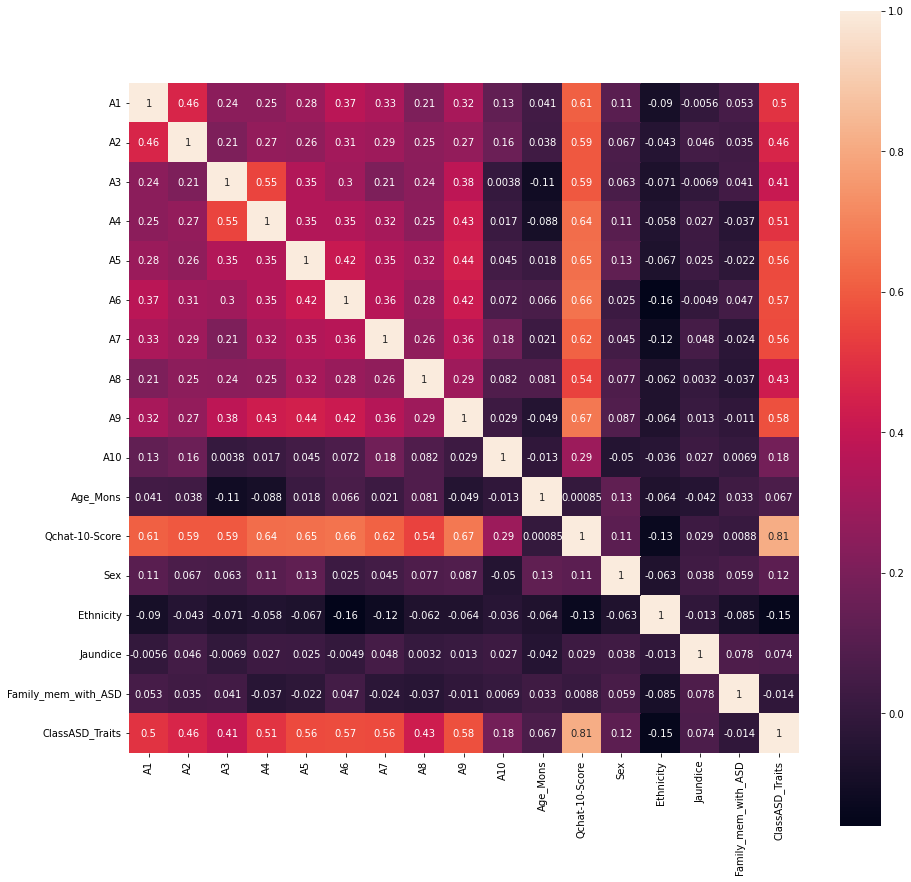

In [ ]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#creating training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 7, stratify = y) #using stratify we make distribution of classes same in both training and testing set
print('Processed...')

Processed...


In [ ]:
#distribution in training set
y_train.value_counts(normalize=True) #normalize returns %

1    0.690391
0    0.309609
Name: ClassASD_Traits, dtype: float64

In [ ]:
#distribution in testing set
y_test.value_counts(normalize=True)

1    0.691943
0    0.308057
Name: ClassASD_Traits, dtype: float64

### Decision Tree Clasifier

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


**Support Vector Machine**

In [ ]:
from sklearn import svm
csvm = svm.SVC()
csvm.fit(x_train, y_train)

SVC()

In [ ]:
csvm_predict = csvm.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, csvm_predict)*100)

Accuracy: 100.0


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier()
randfor.fit(x_train, y_train)
randfor_pred = clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, randfor_pred)*100)

ACCURACY OF THE MODEL:  100.0


**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train,y_train)
adb_pred = adb.predict(x_test)
print("The accuracy of the model on validation set is", metrics.accuracy_score(y_test,adb_pred)*100)

The accuracy of the model on validation set is 100.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 65,   0],
       [  0, 146]])

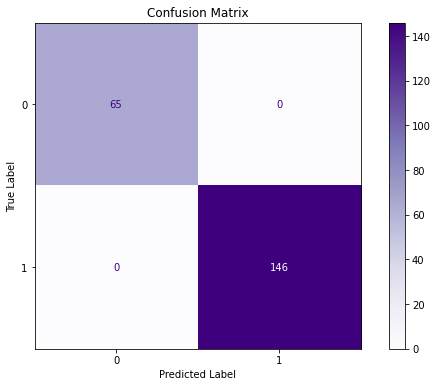

In [ ]:
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



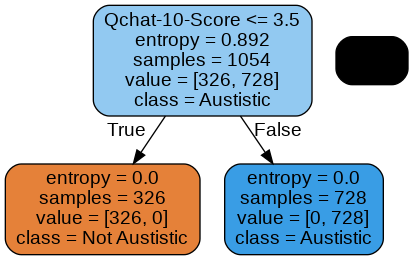

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
clf = clf.fit(x,y)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = x.columns , class_names=['Not Austistic','Austistic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entropy.png')
Image(graph.create_png())

### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import math
math.sqrt(len(y_test))

14.52583904633395

In [ ]:
#Train K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=13, p=2, metric = 'euclidean')
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.10426540284361


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 61,   4],
       [  0, 146]])

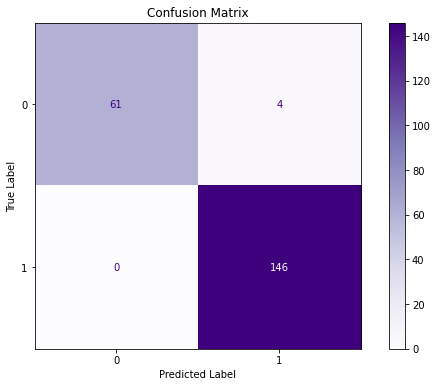

In [ ]:
matrix = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        65
           1       0.97      1.00      0.99       146

    accuracy                           0.98       211
   macro avg       0.99      0.97      0.98       211
weighted avg       0.98      0.98      0.98       211



### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Train Logistic Regression Classifier
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = log_reg.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 65,   0],
       [  0, 146]])

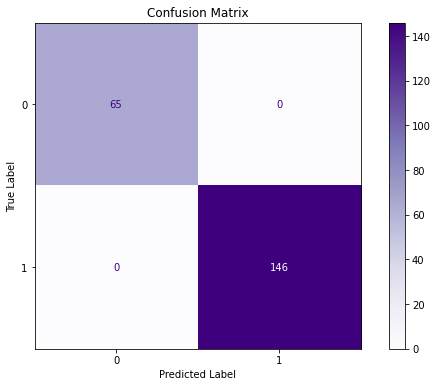

In [ ]:
matrix = plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Purples)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

